In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


df_uae_properties = pd.read_csv('/Users/arsi/Documents/Coding/machineLearning/uae_properties.csv')
display(df_uae_properties.head())

,id,title,displayAddress,bathrooms,bedrooms,addedOn,type,rera,propertyType,price
0,10837871,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",2,3,2024-01-06T17:05:24+00:00,buy,8.171857e+08,apartment,3950000
1,10880180,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-13T21:19:31+00:00,buy,8.171857e+08,apartment,2600000
2,11220200,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",2,3,2024-03-12T03:18:54+00:00,buy,2.125966e+09,apartment,3450000
3,11176502,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",2,3,2024-03-04T06:53:51+00:00,buy,7.114978e+10,apartment,2000000
4,11179908,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",2,0,2024-03-04T13:24:39+00:00,buy,4.652616e+08,apartment,284000


In [49]:
# Examine the dataset's shape
print("Dataset shape:", df_uae_properties.shape)

# View data types and missing values
print("\nData types and missing values:\n", df_uae_properties.info())

# Analyze the distribution of property prices
print("\nDescriptive statistics of property prices:\n", df_uae_properties['price'].describe())

# Explore the unique values of categorical features
print("\nUnique property types:\n", df_uae_properties['propertyType'].unique())
print("\nUnique locations:\n", df_uae_properties['displayAddress'].unique())

Dataset shape: (492, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              492 non-null    int64  
 1   title           492 non-null    object 
 2   displayAddress  492 non-null    object 
 3   bathrooms       492 non-null    int64  
 4   bedrooms        492 non-null    int64  
 5   addedOn         492 non-null    object 
 6   type            492 non-null    object 
 7   rera            323 non-null    float64
 8   propertyType    492 non-null    object 
 9   price           492 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 38.6+ KB

Data types and missing values:
 None

Descriptive statistics of property prices:
 count    4.920000e+02
mean     2.166491e+06
std      2.126998e+06
min      2.330000e+05
25%      9.529638e+05
50%      1.499000e+06
75%      2.434250e+06
max      1.450000e+07
Name: pr

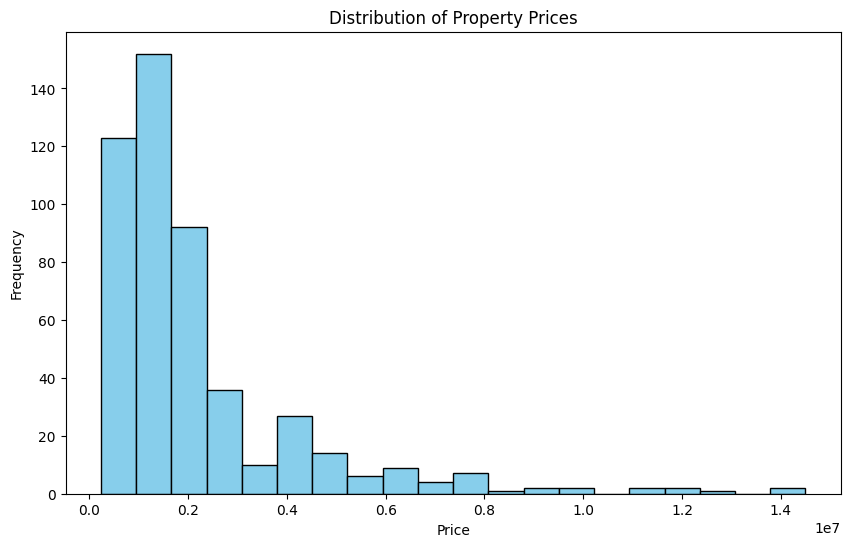

In [50]:
# Visualize the distribution of property prices using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_uae_properties['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Property Prices')
plt.show()

In [51]:
# Identify columns with missing values
missing_values = df_uae_properties.isnull().sum()
print("Missing values per column:\n", missing_values)

# Handle missing values in the 'rera' column (replace with mode)
df_uae_properties.fillna({'rera': df_uae_properties['rera'].mode()[0]}, inplace=True)

# Remove duplicate rows
df_uae_properties.drop_duplicates(inplace=True)

# Verify that missing values and duplicates are handled
print("\nMissing values after handling:\n", df_uae_properties.isnull().sum())
print("\nNumber of duplicate rows:", df_uae_properties.duplicated().sum())

Missing values per column:
 id                  0
title               0
displayAddress      0
bathrooms           0
bedrooms            0
addedOn             0
type                0
rera              169
propertyType        0
price               0
dtype: int64

Missing values after handling:
 id                0
title             0
displayAddress    0
bathrooms         0
bedrooms          0
addedOn           0
type              0
rera              0
propertyType      0
price             0
dtype: int64

Number of duplicate rows: 0


In [52]:
# Identify categorical features
categorical_features = ['propertyType', 'displayAddress']

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(df_uae_properties[categorical_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features)

# Concatenate the encoded features with the original DataFrame
df_uae_properties = pd.concat([df_uae_properties, encoded_df], axis=1)

# Drop original categorical columns
df_uae_properties.drop(categorical_features, axis=1, inplace=True)

# Separate features and target variable
X = df_uae_properties.drop('price', axis=1)
y = df_uae_properties['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Identify numerical features
numerical_features = ['bathrooms', 'bedrooms', 'rera']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(df_uae_properties[numerical_features])

# Create a DataFrame from the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

# Replace original numerical columns with scaled columns
df_uae_properties[numerical_features] = scaled_df

In [54]:
# Convert 'addedOn' to datetime objects
df_uae_properties['addedOn'] = pd.to_datetime(df_uae_properties['addedOn'])

# Extract year, month, and day of the week
df_uae_properties['listing_year'] = df_uae_properties['addedOn'].dt.year
df_uae_properties['listing_month'] = df_uae_properties['addedOn'].dt.month
df_uae_properties['listing_dayofweek'] = df_uae_properties['addedOn'].dt.dayofweek

# Calculate total_rooms
df_uae_properties['total_rooms'] = df_uae_properties['bedrooms'] + df_uae_properties['bathrooms']

# Create interaction term
df_uae_properties['bedroom_bathroom_interaction'] = df_uae_properties['bedrooms'] * df_uae_properties['bathrooms']

# Drop the original 'addedOn' column
df_uae_properties.drop('addedOn', axis=1, inplace=True)

In [55]:
# Separate features and target variable
X = df_uae_properties.drop('price', axis=1)
y = df_uae_properties['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


# Encode the 'type' column using LabelEncoder
le = LabelEncoder()
X_train['type'] = le.fit_transform(X_train['type'])
X_test['type'] = le.transform(X_test['type'])

# Instantiate a LinearRegression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train.drop(['id', 'title'], axis=1), y_train)

# Predict the prices for the test data
y_pred = model.predict(X_test.drop(['id', 'title'], axis=1))

In [57]:

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Analyze the results
print("\nModel Performance Analysis:")
if r_squared > 0.7:
    print("The R-squared value is satisfactory, indicating a good fit of the model.")
else:
    print("The R-squared value is not satisfactory, suggesting that the model might not be capturing the relationship between the features and the target variable well.")
if mse < 100000000:  # Adjust this threshold based on the problem context
    print("The MSE is acceptable.")
else:
    print("The MSE is not acceptable. The model's predictions have a high level of variance from the actual values.")
if mae < 200000:  # Adjust this threshold based on the problem context
    print("The MAE is acceptable.")
else:
    print("The MAE is not acceptable. The model's predictions deviate significantly from the actual values.")

R-squared: 0.2900
Mean Squared Error (MSE): 3477578291498.9199
Mean Absolute Error (MAE): 1069087.5438

Model Performance Analysis:
The R-squared value is not satisfactory, suggesting that the model might not be capturing the relationship between the features and the target variable well.
The MSE is not acceptable. The model's predictions have a high level of variance from the actual values.
The MAE is not acceptable. The model's predictions deviate significantly from the actual values.
